In [1]:
arr = [1, 2, 3, 4, 5]
len(arr)
arr[:3]

[1, 2, 3]

In [2]:
def left_rotate_arr(nums, k):
    #get k temp variables
    print(len(nums))
    # k+=1
    temp = [0]*k
    for i in range(k):
        temp[i] = nums[i]

    print(temp)

    #now shift elements from k to i-k
    for i in range(k, len(nums)):
        nums[i-k] = nums[i]

    print(nums)
    #now put back the temp elements at the end
    for i in range(len(nums)-k, len(nums)):
        nums[i] = temp[i - (len(nums) - k)]

    return nums


In [3]:
def right_rotate_arr(nums, k):
    #get k temp variables
    print(len(nums))
    # k+=1
    temp = []
    for i in range(len(nums)-k, len(nums)):
        print(nums[i])
        temp.append(nums[i])

    print(temp)

    #now shift elements from k to i-k
    for i in range(len(nums)-k-1, -1, -1):
        nums[i+k] = nums[i]

    print(nums)
    #now put back the temp elements at the end
    for i in range(len(temp)):
        nums[i] = temp[i]

    return nums

In [4]:
right_rotate_arr([-1,-100,3,99], 2)

4
3
99
[3, 99]
[-1, -100, -1, -100]


[3, 99, -1, -100]

In [5]:
right_rotate_arr([1,2,3,4,5,6,7], 3)

7
5
6
7
[5, 6, 7]
[1, 2, 3, 1, 2, 3, 4]


[5, 6, 7, 1, 2, 3, 4]

In [6]:

k=3
lst[:3].reverse()

NameError: name 'lst' is not defined

In [ ]:
def reverse(nums, li, ri):
    while li < ri:
        temp = nums[li]
        nums[li] = nums[ri]
        nums[ri] = temp

        li += 1
        ri -= 1

    return nums

In [ ]:
lst = [1,2,3,4,5,6,7]
reverse(lst, 0, len(lst)-k-1)
reverse(lst, len(lst)-k, len(lst)-1)
reverse(lst, 0, len(lst)-1)

[5, 6, 7, 1, 2, 3, 4]

# Move Zeroes

In [ ]:
nums = [0, 1, 0, 3]

def move_zeroes(nums):
    temp = []
    for i in range(len(nums)):
        if nums[i] != 0:
            temp.append(nums[i])
    print(temp)

    for i in range(len(temp)):
        nums[i] = temp[i]

    for j in range(len(temp), len(nums)):
        nums[j] = 0

    return nums


In [ ]:

move_zeroes([1, 2, 0, 2, 1])

[1, 2, 2, 1]


[1, 2, 2, 1, 0]

### Optimal approach

In [ ]:
def move_zeroes(nums):
    j = 0
    for i in range(0, len(nums)):
        if nums[i] == 0:
            j = i
            break

    for k in range(j+1, len(nums)):
        if nums[k] != 0 and nums[j]==0:
            nums[k], nums[j] = nums[j], nums[k]

            j += 1

    return nums


In [ ]:

move_zeroes([2, 1])

[2, 1]

# Two Sum

## Bruteforce
Use two for loops to traverse the array and find the sum

In [ ]:
def two_sum(arr, res):
    for i in range(len(arr)):
        for j in range(i, len(arr)):
            if arr[i] + arr[j] == res:
                return [i, j]
            
    return []

two_sum([2,7,11,15], 9)


[0, 1]

## Better Solution
Using additional datas structure to optimize the problem

In [ ]:
def two_sum(arr, target):
    arrHash = {}

    for i in range(len(arr)):
        res = target - arr[i]

        if res in arrHash:
            return [arrHash[res], i]
        else:
            arrHash[arr[i]] = i

two_sum([2,7,11,15], 9)

[0, 1]

## Optimal
Using two pointers with scanning
We cant use this here. Because array is not sorted

In [ ]:
def two_sum(arr, target):
    i = 0
    j = 0
    sum_arr = 0

    while j < len(arr):
        if sum_arr < target:
            sum_arr += arr[j]
            j += 1

        while sum_arr >= target and i < j:
            sum_arr -= arr[i]
            i += 1   

        print(sum_arr)   
        
        if sum_arr == target:
            return [i, j]

two_sum([3,2,4], 6)

3
5
4


# Sort Colors

# Bruteforce -> Better
Brute is all about using a sorting algorithm

In [ ]:
def sortColors(arr):
    count_0 = 0
    count_1 = 0
    count_2 = 0

    for i in range(len(arr)):
        if arr[i] == 0:
            count_0 += 1

        elif arr[i] == 1:
            count_1 += 1

        else:
            count_2 += 1

    for i in range(0, count_0):
        arr[i] = 0

    for j in range(count_0, count_0+count_1):
        arr[j] = 1

    for k in range(count_0+count_1, len(arr)):
        arr[k] = 2

    return arr

sortColors([2,0,2,1,1,0])


[0, 0, 1, 1, 2, 2]

# Optimal
Using dutch national flag algorithm

In [ ]:
def sortedColor(arr):
    low = 0
    mid = 0
    high = len(arr)-1

    while mid < high:
        if arr[mid] == 0:
            arr[low], arr[mid] = arr[mid], arr[low]
            mid += 1
            low += 1

        elif arr[mid] == 1:
            mid += 1

        else:
            #when arr[mid] == 2
            arr[mid], arr[high] = arr[high], arr[mid]
            high -= 1

    return arr


sortColors([2,0,1])
        


[0, 1, 2]

# Majority Elements

### Bruteforce
This approach can use two arrays. One which traverse the array and another which helps us count the element.
TC = O(n**2)

In [ ]:
def majorityCount(nums):
    for i in range(len(nums)):
        count = 0
        
        for j in range(len(nums)):
            if nums[j] == nums[i]:
                count += 1

        if count > len(nums)//2:
            return nums[i]

In [ ]:
majorityCount([2,2,1,1,1,2,2])

2

### Better
We can maintain a hashmap where each element corresponds to its count. Then we traverse the hashmap and find if any element's count is more than or equal to n//2.
- T.C. = O(n)
- S.C = O(n)

In [ ]:
def majorityCount(nums):
    hash_nums = {}

    for i in range(len(nums)):
        if nums[i] in hash_nums:
            hash_nums[nums[i]] += 1

        else:
            hash_nums[nums[i]] = 1

    for key, val in hash_nums.items():
        if val > len(nums)//2:
            return key
    

In [ ]:
majorityCount([2,2,1,1,1,2,2])

2

### Optimal

We will use maximum voting algorithm here.  
1. Use moore voting algorithm
- take arr[0] as initial element. and turn its count = 1. Increment count if arr[i]==arr[0] elif arr[i] != arr[0] then decrement the elemeent count. if count == 0 then make the arr[i] as element and initialize the count to 1. This will work till last of arr
2. Verify the most voted element

In [ ]:
def majorityCount(nums):
    ele = nums[0]
    count = 1
    for i in range(len(nums)):
        if nums[i] == ele:
            count += 1

        else:
            count -= 1

        if count == 0:
            ele = nums[i]
            count = 1

    #verify
    ele_count = 0
    for i in range(len(nums)):
        if nums[i] == ele:
            ele_count += 1

    if ele_count > len(nums)//2:
        return ele
    
    else:
        print()
        return -1

In [ ]:
majorityCount([2, 2, 1, 2, 2])

2

# Maximum Subarray

### Bruteforce
The most bruteforce approach can be to use two loops. 
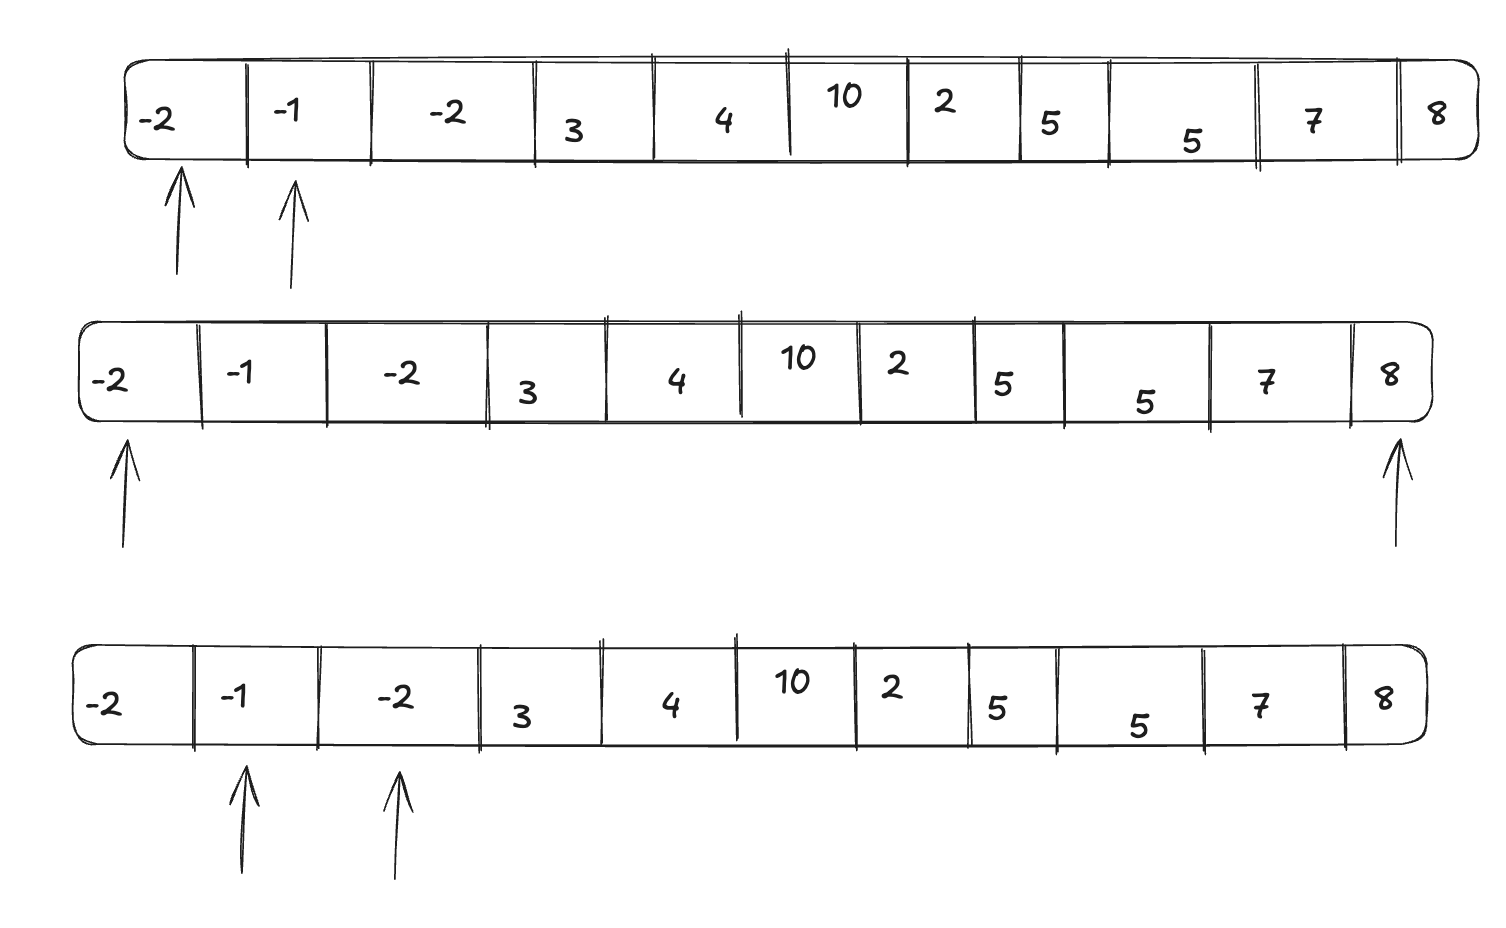

In [ ]:
def maximum_subarray(nums):
    max_sum = 0
    for i in range(len(nums)):
        #ith element initializes the sum
        nums_sum = 0
        for j in range(i, len(nums)):
            #we keep on adding jth term
            nums_sum += nums[j]
            max_sum = max(max_sum, nums_sum)

    return max_sum

In [ ]:
maximum_subarray([-2,1,-3,4,-1,2,1,-5,4])

6

In [ ]:
maximum_subarray([-2, 1])


1

## Optimal Approach
We can use Kadan's Algorithm. Kadan's Algorithm adds the ith element when nums[i] > 0. For nums[i] < 0 it ignores.
- algorithm
    1. initilize max to - inf
    2. start iterating in the array (i -> len(array))
    -    3. initialize sum = array[i]
    -    5. max = max(sum, max)
    -    4. if nums[i] < 0:
            nums=0


In [ ]:
def max_subarray(nums):
    import math
    max_sum = -(math.inf)
    nums_sum = 0

    for i in range(nums):
        nums_sum += nums[i]
        max_sum = max(nums_sum, max_sum)

        if nums_sum < 0:
            nums_sum = 0
            
    return max_sum

    


In [ ]:
maximum_subarray([-2,1,-3,4,-1,2,1,-5,4])

6

# Best Time to Buy and Sell Stock

Here we are given an array which consists of prices of stock on 0->n days. We have to find the maximum profit. A stock sells higher / has max profit when price[j] > price[i], where i < j.
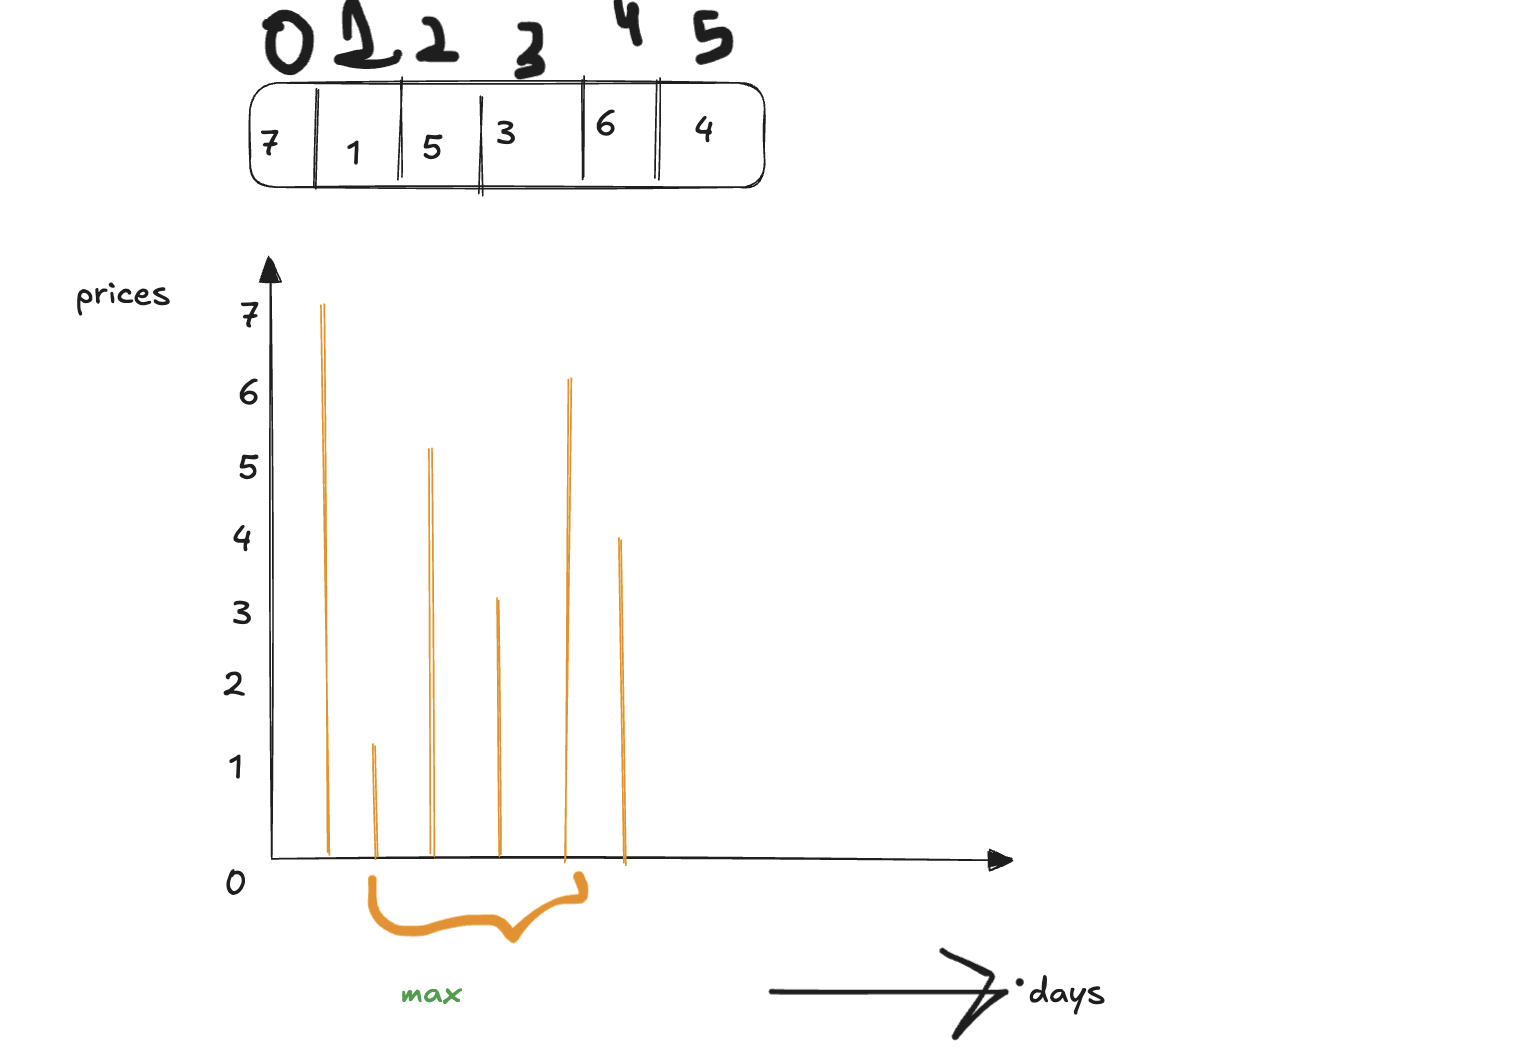

### Bruteforce
One of the most basic approach can be using two loop traversals. We start one loop at i and other loop at j=i+1, both ending at len(arr). We compare both arr[i] and arr[j]. then diff=arr[j] - arr[i]. If diff > max_diff, max_diff = diff

In [ ]:
def maxProfit(nums):
    profit = 0

    for i in range(len(nums)):
        for j in range(i+1, len(nums)):
            diff = nums[j] - nums[i]
            profit = max(diff, profit)

    return profit

In [ ]:
maxProfit([7,1,5,3,6,4])

5

# Optimal
To make the previous apporach better we keep a track of min element. Then we compare that min with each arr[i]. We then compute profit and assign to max if more than previous

In [ ]:
def maxProfit(nums):
    minEle = 0
    profit = 0

    for i in range(len(nums)):
        diff = nums[i] - minEle
        profit = max(profit, diff)
        minEle = min(nums[i], minEle)

    return profit

In [ ]:
maxProfit([7,1,5,3,6,4])

7

## Print Permutations

## Bruteforce approach

In [ ]:
def permutation(ds, nums, ans, freq):
    if len(ds) == len(nums):
        ans.append(ds.copy())
        return

    for i in range(len(nums)):
        if not freq[i]:
            ds.append(nums[i])
            freq[i] = True
            permutation(ds, nums, ans, freq)
            ds.pop()
            freq[i] = False

def permute(nums):
    """
    :type nums: List[int]
    :rtype: List[List[int]]
    """
    ds = []
    ans = []
    freq = [False] * (len(nums))
    permutation(ds, nums, ans, freq)

    return ans

permute([1,2,3])


[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]

## Using this to find Next Permutation

In [ ]:
def permutation(ds, nums, ans, freq):
    if len(ds) == len(nums):
        ans.append(ds.copy())
        return

    for i in range(len(nums)):
        if not freq[i]:
            ds.append(nums[i])
            freq[i] = True
            permutation(ds, nums, ans, freq)
            freq[i] = False
            ds.pop()

def permute(nums):
    """
    :type nums: List[int]
    :rtype: List[List[int]]
    """
    ds = []
    ans = []
    freq = [False] * (len(nums))
    permutation(ds, nums, ans, freq)

    ans.sort()
    print(ans)

    for i in range(len(ans)):
        if ans[i] == nums:
            continue
        return ans[i]

    return ans[0]

permute([3, 2, 1])


[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]


[1, 2, 3]

## Optimal Solution
1. First find the first longest prefix
2. Find the smallest greatest element from arr[i]
3. Now reverse the idx+1 to len(arr) because as we know the elements from len(arr) to idx are in increasing order

In [ ]:
def nextGreatestPermutation(arr):
    # reversing the elements from i to j
    def reverse(arr, i=0, j=0):
        while i < j:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
            j -= 1

    
    #finding the first longest element
    idx = -1
    for i in range(len(arr)-2, -1, -1):
        if arr[i] < arr[i+1]:
            idx = i
            break

    if idx == -1:
        reverse(arr, 0, len(arr)-1)
        return arr



    #find the greatest element from arr[idx]
    for i in range(len(arr)-1, -1, -1):
        if arr[idx] < arr[i]:
            arr[idx], arr[i] = arr[i], arr[idx]
            break

    #Now reverse the elements from arr[idx+1] to arr[n]
    reverse(arr, idx+1, len(arr)-1)

    return arr

nextGreatestPermutation([1, 3, 2]) 

    

[2, 1, 3]

In [ ]:
arr = [10, 4, 2, 4, 1]
idx = -1
res = []
for i in range(len(arr)-2, -2, -1):
    if not res:
        res.append(arr[i+1])

    if arr[i] <= arr[i+1]:
        res.append(arr[i+1])

print(res)

[1, 4, 10]


# Longest Consecutive Sequence in an Array

## Bruteforce Approach

In [ ]:
def longestConsecutive(arr):
    longest = 1
    def ls(arr, x):
        for i in arr:
            if i == x:
                return True

    for i in range(len(arr)):
        count = 1
        x = arr[i]

        while ls(arr, x+1) == True:
            x += 1
            count += 1

        longest = max(longest, count)

    return longest

longestConsecutive([0,3,7,2,5,8,4,6,0,1])

9

## Better Approach
We first sort the array elements. Then we check following conditions:
- If current element is same as lastSmaller, then continue
- If current element is an increment of lastsmaller, then make this existing element as lastsmaller and increment count
- else reset the count and make the new element as lastsmaller. this means new element has occured.

TC: O(N log N) + O(N) -> based on sorting
SC = O(1)

In [ ]:
import math
def longestConsecutive(arr):
    arr.sort()
    currCount = 0
    lastSmaller = -math.inf
    longest = 1

    for i in range(len(arr)):
        if arr[i] == lastSmaller:
            continue
        
        if arr[i] == lastSmaller + 1:
            currCount += 1
            lastSmaller = arr[i]

        else:
            currCount = 1
            lastSmaller = arr[i]

        longest = max(longest, currCount)

    return longest

longestConsecutive([0,3,7,2,5,8,4,6,0,1]
)



9

## Optimal Approach

We first store the arr elements inside a set. Then we traverse the set. we check if the element-1 of a element is present in set, if yes then it means it isn't a starting point. if element-1 is not in the set, it means the element-1 can be starting point. So we start from element-1 and find if the element+1 elements exists in set

TC: O(N)
SC: O(N)

In [ ]:
def longestConsecutive(arr):
    longest=0
    arr_set = set()
    if len(arr) == 0:
        return 0
    
    for i in range(len(arr)):
        arr_set.add(arr[i])

    for i in arr_set:
        if i-1 in arr_set:
            continue
        else:
            count = 0
            while i+1 in arr_set:
                i = i+1
                count += 1


        longest = max(longest, count)

    return longest

longestConsecutive([100,4,200,1,3,2])
        
        

3

# Set Matrix Zeroes

## My approach
- find the zero elements and store them in a hashmap
- traverse throught the row and make the elemetns of that row where 0 exists to 0
- traverse through the columns and make the elements of that cols to 0.

In [ ]:
def setZeroMatrix(arr):
    zeroes = dict()

    for i in range(len(arr)):
        for j in range(len(arr[i])):
            if arr[i][j] == 0:
                print(i, j)
                zeroes[j] = i
    
    print(zeroes)

    for i, j in zeroes.items():
        for k in range(len(arr)):
            arr[k][j] = 0

        for k in range(len(arr[i])):
            arr[i][k] = 0

    return arr

setZeroMatrix([[0,0,0,5],[4,3,1,4],[0,1,1,4],[1,2,1,3],[0,0,1,1]])

0 0
0 1
0 2
2 0
4 0
4 1
{0: 4, 1: 4, 2: 0}


IndexError: list assignment index out of range

# Bruteforce Approach

Traverse through the matrix. Wherever we find 0 we make that whole row and column to -1. Then later to 0

In [ ]:
def markRow(arr, i):
    for j in range(len(arr[i])):
        arr[i][j] = -1

def markCols(arr, j):
    for i in range(len(arr)):
        arr[i][j] = -1

def setZeroMatrix(arr):
    # mark the rows and cols where 0 occurs to -1
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            if arr[i][j] == 0:
                markRow(arr, i)
                markCols(arr, j)

    #now change the elements where -1 is present to 0
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            if arr[i][j] == -1:
                arr[i][j] = 0

                
    return arr


setZeroMatrix([[1,1,1],[1,0,1],[1,1,1]])

[[1, 0, 1], [0, 0, 0], [1, 0, 1]]

#### T.C: O((mxn) (mxn) + (mxn))
#### S.C: O(1)

## Better Approach
We will mark the locations where we find the zeroes as 1. And then take the rows and cols and mark them as 0's. 

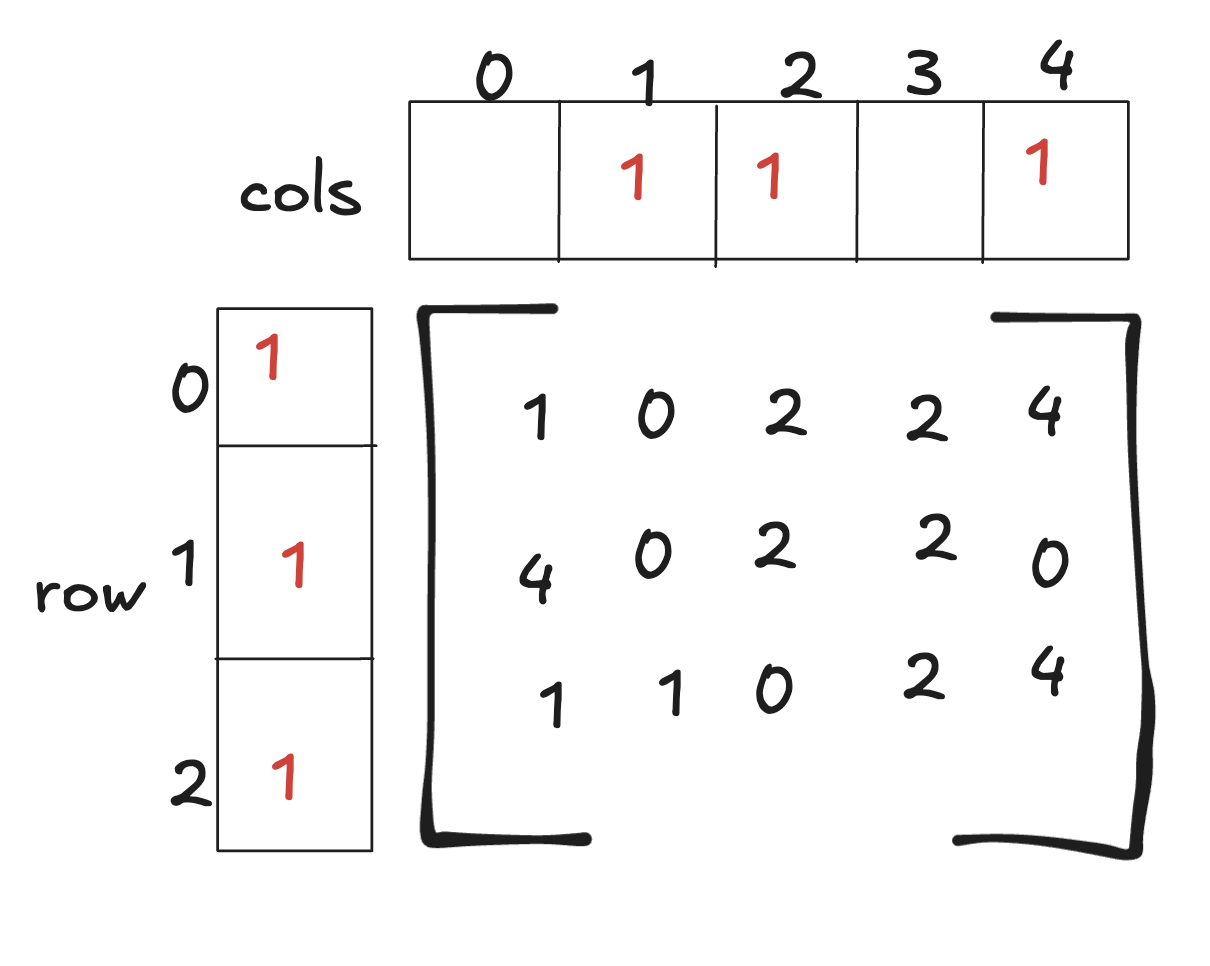

In [ ]:
def setZeroMatrix(arr):
    rows = [0] * (len(arr))
    cols = [0] * (len(arr[0]))

    for i in range(len(arr)):
        for j in range(len(arr[i])):
            if arr[i][j] == 0:
                rows[i] = 1
                cols[j] = 1

                print(rows)
                print(cols)

    for i in range(len(rows)):
        for j in range(len(cols)):
            if rows[i] == 1 or cols[j] == 1:
                arr[i][j] = 0

    print(arr)

setZeroMatrix([[0,1,2,0],[3,4,5,2],[1,3,1,5]])

[1, 0, 0]
[1, 0, 0, 0]
[1, 0, 0]
[1, 0, 0, 1]
[[0, 0, 0, 0], [0, 4, 5, 0], [0, 3, 1, 0]]


## Optimal Approach
Here, instead of taking two separte rows and cols. We can allocate the 0th of arr[i][j] to the arr[0][j] and arr[i][0]th elements

In [ ]:
def setZeroMatrix(arr):
    cols0 = 1

    for i in range(len(arr)):
        for j in range(len(arr[i])):
            if arr[i][j] == 0:
                arr[i][0] = 0
                if j != 0:
                    arr[0][j] = 0
                else:
                    cols0 = 0


    #iterate without the 0th col and 0th row
    for i in range(len(arr)-1, 0, -1):
        for j in range(len(arr[i])-1, 0, -1):
            if arr[i][j] != 0:
                #check if the element corresponding to this index in the row or col in 0 if yes, turn them to 0
                if arr[i][0] == 0:
                    arr[i][j] = 0
                
                if arr[0][j] == 0:
                    arr[i][j] = 0

    if arr[0][0] == 0:
        for j in range(len(arr[i])):
            arr[0][j] = 0


    if cols0 == 0:
        for i in range(len(arr)):
            arr[i][0] = 0


setZeroMatrix([[0,1]])

[[0, 1]]
0
1
[[0, 0]]


# Rotating a Matrix by 90
We can transpose the matrix and then swap the columns.

## Bruteforce Approach
Here we create an answer array and just shift the ith row to (n-1)-ith col.

## Optimal Approach
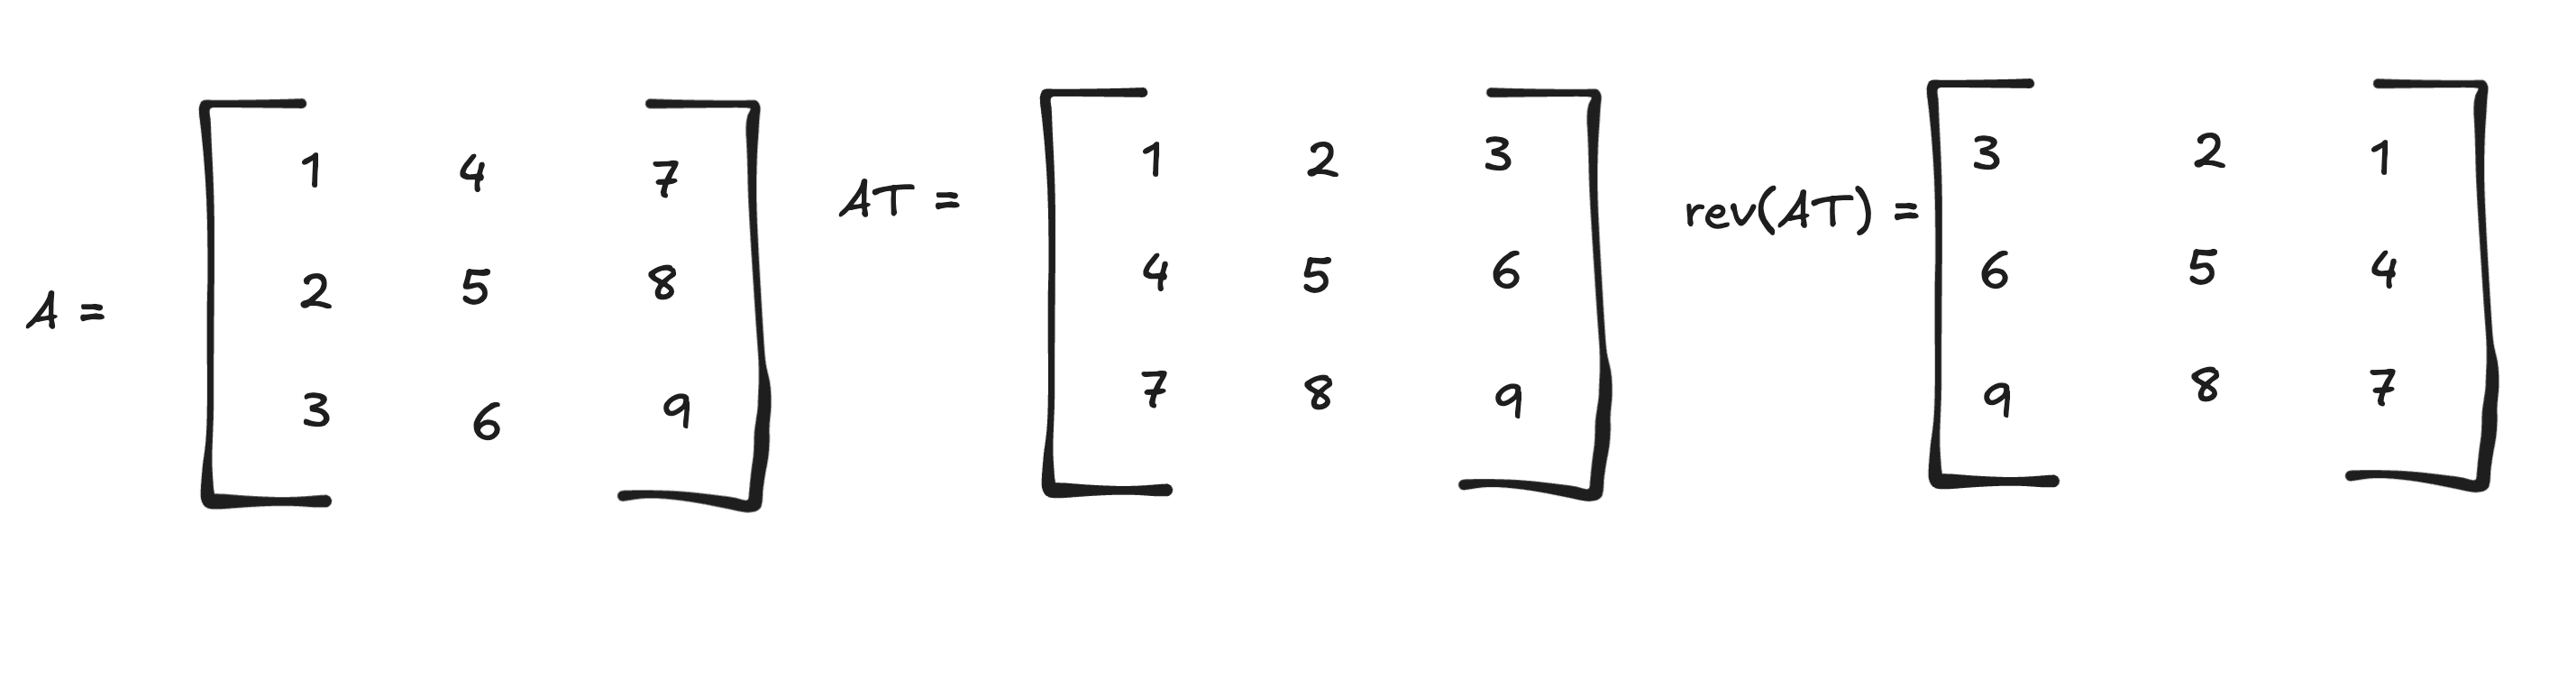

In [ ]:
def rotate_matrix(arr):
    #transpose the arr
    for i in range(len(arr)):
        for j in range(i, len(arr[i])):
                arr[i][j], arr[j][i] = arr[j][i], arr[i][j]

    print(arr)

    #reversing the arr
    for i in range(len(arr)):
        j = 0
        j_prime = len(arr)-1

        while j < j_prime:
            arr[i][j], arr[i][j_prime] = arr[i][j_prime], arr[i][j]
            j += 1
            j_prime -= 1

    print(arr)

In [ ]:
rotate_matrix([[5,1,9,11],[2,4,8,10],[13,3,6,7],[15,14,12,16]])

[[5, 2, 13, 15], [1, 4, 3, 14], [9, 8, 6, 12], [11, 10, 7, 16]]
[[15, 13, 2, 5], [14, 3, 4, 1], [12, 6, 8, 9], [16, 7, 10, 11]]


# Subarray sum equal k
We are given an array. We have to find the number of subarrays which equals to k.
A subarray is contiguous non empty sequence of elements in array.

ex: [1, 1, 1] k=2
o/p: 2

IP: [1, 2, 3] k=3
o/p: 2

In [ ]:
def sumsubarray(arr, k):
    count = 0
    for i in range(len(arr)):
        sum_arr = 0
        for j in range(i, len(arr)):
            sum_arr += arr[j]
            if sum_arr == k:
                count += 1

    return count

In [ ]:
sumsubarray([1,2,3], 3)


2

## Optimal
We will use the same approach of finding the longest subarray of k

In [ ]:
def sumsubarray(arr, k):
    preSum = {}
    sum_arr = 0
    count = 0

    for i in range(len(arr)):
        sum_arr += arr[i]
        if sum_arr == k:
            count += 1

        rem = sum_arr - k

        if rem in preSum:
            count += 1

        preSum[sum_arr] = i

    return count

sumsubarray([1, 1, 3], 2)


1

## Merging Two sorted array without extra spacr

In [5]:
def mergeTwoSortedArray(arr1, arr2, m, n):
    i=m-1
    j=len(arr1)-1
    k=len(arr2)-1

    while k>0:
        if arr1[i] < arr2[k]:
            arr1[j] = arr2[k]
            j-=1

        else:
            arr1[i], arr1[j] = arr1[j], arr1[i]
            arr1[i] = arr1[k]
            i-=1
            j-=1

        k-=1

    return arr1

 
arr1=[1, 2, 3, 0, 0, 0]
arr2=[2, 4, 5]
m=3
n=3
print(mergeTwoSortedArray(arr1, arr2, m, n))
    

[1, 2, 3, 0, 4, 5]


In [ ]:
#Correct Approach
def mergeTwoArray(nums1, nums2, m, n):
    last=m+n-1

    while m>0 and n>0:
        if nums1[m-1]>nums2[n-1]:
            nums1[last] = nums1[m-1]
            m-=1

        else:
            nums1[last]=nums2[n-1]
            n-=1

        last-=1

    #put left over elemnets
    while n>0:
        nums1[last]=nums[n-1]
        last-=1
        n-=1

    return nums1



_IncompleteInputError: incomplete input (4160577541.py, line 11)

# Count Inversion
Count inversion is number of pairs of (i, j) such that arr[j] < arr[i]

In [3]:
def countInversion(arr):
    count = 0

    for i in range(0, len(arr)):
        for j in range(i+1, len(arr)):
            if arr[i] > arr[j]:
                count += 1

    return count

arr = [2, 3, 4, 5, 6]
countInversion(arr)

0

## Optimal using merger sort
### Fundamentals of merge sort

In [47]:
# merge two subarrays
def mergeSubarr(a, low, mid, high):
    left = a[low:mid+1]
    right = a[mid+1:high+1]

    k = low
    i=0
    j=0
    count = 0

    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            a[k] = left[i]
            k += 1
            i += 1

        else:
            a[k] = right[j]
            k += 1
            j += 1
            count += len(left) - i

    while i < len(left):
        a[k] = left[i]
        k += 1
        i += 1

    while j < len(right):
        a[k] = right[j]
        k += 1
        j += 1

    print(a)

    return count


def merge(arr, l, r):
    count = 0
    if r > l:
        m = (l+r)//2
        count += merge(arr, l, m)
        count += merge(arr, m+1, r)
        count += mergeSubarr(arr, l, m, r)

    return count

In [48]:
def countInversion(arr):
    l = 0 
    r = len(arr)
    cnt = merge(arr, l, r)

    return cnt

countInversion([24, 18, 38, 43, 14, 40, 1, 54])

[18, 24, 38, 43, 14, 40, 1, 54]
[18, 24, 38, 43, 14, 40, 1, 54]
[18, 24, 38, 14, 43, 40, 1, 54]
[14, 18, 24, 38, 43, 40, 1, 54]
[14, 18, 24, 38, 43, 1, 40, 54]
[14, 18, 24, 38, 43, 1, 40, 54]
[14, 18, 24, 38, 43, 1, 40, 54]
[1, 14, 18, 24, 38, 40, 43, 54]


12

# Reverse Pairs

## About the problem:
An array is said to have reverse pairs if \
    - i < j where i and j are indexes \
    - arr[i] > 2 * arr[j]

### Bruteforce approach
Just use two loops, conditionally compare the index and the value at that index.

In [3]:
def reverse_pairs(arr):
    cnt = 0
    for i in range(len(arr)):
        for j in range(i+1, len(arr)):
            if arr[i] > (2*arr[j]) and i < j:
                cnt += 1

    return cnt

reverse_pairs([1,3,2,3,1])

2

## Optimal Solution
Using merge sort we can solve this problem.

In [35]:
def countReverse(arr1, arr2):
    i = 0
    j = 0
    cnt=0
    len_j = len(arr2)-1

    while i < len(arr1) and j < len(arr2):
        if arr1[i] > 2 * arr2[j]:
            cnt += (len_j - j) + 1
            j += 1

        else:
            i += 1

    return cnt


def mergeSort(arr, low, mid, high):
    left = arr[low:mid+1]
    right = arr[mid+1:high+1]

    i = 0
    j = 0
    low = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            arr[low] = left[i]
            low += 1
            i += 1

        else:
            arr[low] = right[j]
            low += 1
            j += 1

    while i < len(left):
        arr[low] = left[i]
        i += 1
        low += 1

    while j < len(right):
        arr[low] = right[j]
        j += 1
        high += 1

def merge(arr, l, r):
    count = 0
    if r > l:
        m = (l+r)//2
        count += merge(arr, l, m)
        count += merge(arr, m+1, r)
        count += countReverse(arr[l:m+1], arr[m+1:r+1])
        mergeSort(arr, l, m, r)
        return count
    else:
        return count

    
def reverse_pairs(arr):
    l = 0
    r = len(arr)-1
    count = merge(arr, l, r)
    return count

reverse_pairs([2,4,3,5,1])


1